# Introduction

This worksheet covers the three supervised learning algorithms we looked at in week 14: k-nearest neighbours, linear regression, and the naive Bayes classifier. Similar to last week, you will do some work implementing your own versions of these algorithms, to ensure that you understand the details of them. You will also compare them with the implementations in scikit-learn to test your implementations.

# Preliminaries
Import key packages: NumPy, matplotlib, and any others that you prefer to work with. In general, when writing code, you will put all your import statements at the top. However, for these worksheets we will import as we go along.

In [1]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt

# Question 1: k-nearest neighbours classification
In this question we will use the k-nearest neighbours algorithm to make predictions on the breast cancer Wisconsin dataset. This is a classification problem where the aim is to classify instances as either being malignant or benign based on the following 10 features:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter squared/ area −1)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (‘coastline approximation’ −1)

In this question you will:
    (a) download the dataset from sklearn and store the data and targets in suitable variables, 
    (b) separate your data into a training and test split, 
    (c) (Optional) write your own function to implement k-nearest neighbours, 
    (d) (Optional) check your implementation with that of sklearn. 
    (e) select the most appropriate value of $k$ using cross-validation.

## Part (a)
Import the package `datasets` from `sklearn` and then load the breast cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`. 
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?

In [210]:
# Import suitable packages, load the dataset, and save data and targets into variables X and Y
# import packages
##TODO##
from sklearn.datasets import load_breast_cancer

# load dataset and save data and targets into X and Y
##TODO##
data = load_breast_cancer()
X = data.data
Y = data.target

In [211]:
print(X.shape)
print(Y.shape)
print(type(X))
print(type(Y))
print(set(Y)) # classification

(569, 30)
(569,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
{0, 1}


## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [212]:
# Import the package train_test_split from sklearn.model_selection.
# Split the dataset into Xtr, Xtest, Ytr, Ytest. Xtest and Ytest will form your held-out
# test set. You will later split Xtr and Ytr into training and validation sets.
from sklearn.model_selection import train_test_split
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 10)

## (Optional) Part (c) 
Recall from the lecture that the k-nearest neighbours algorithm runs as follows:

Training step: Simply store the dataset

Prediction step: Given a datapoint $\vec{x}$:
 - **Find** the k datapoints $(\vec{x}_i, y_i)$ where the distance from $\vec{x}$ to $\vec{x}_i$ is smallest
 - **Return** the majority class from the $y_i$
   
 
What, if anything, do you need to do for the training step?

Write function(s) to implement the k-nearest neighbours prediction step. You may wish to break the procedure down into two functions `predict_datapoint` that makes a prediction for one datapoint and `predict_data` that loops over the whole dataset.

To select the majority class from the nearest neighbours, you can use the function `scipy.stats.mode()`


In [91]:
from scipy.stats import mode
# Write function(s) to implement the prediction step in k-nearest neighbours. 
# You can use the suggested structure below if desired.


# predict_datapoint takes 4 arguments. pt (type: numpy array) is the datapoint we are making a prediction about, 
# Xtrain and Ytrain (numpy arrays) are training data and targets, k (int) is the number of neighbours.
# Returns an integer which is the predicted class for pt
def predict_datapoint(pt, Xtrain, Ytrain, k):
    # For each datapoint in Xtrain, calculate the distance to pt and store
    ##TODO##
    dis = []
    for i in Xtrain:
        dis.append(np.linalg.norm(pt - i))

    # Sort the list of distances (hint: use np.argsort). argsort函数返回的是数组值从小到大的索引值
    ##TODO##
    dis = np.array(dis)
    sorted_list = np.argsort(dis)
    
    # obtain the classes (in Ytrain) of the datapoints with the smallest distance to pt
    ##TODO##
    class_list = []
    for i in sorted_list[0:k]:
        class_list.append(Ytrain[i])
    
    # return the mode of the classes
    ##TODO##
    md, cnt = mode(class_list)
    return md

# predict_data takes 4 arguments: the test data Xtst (numpy array), the training data Xtrain (numpy array),
# the training targets Ytrain (numpy array), and the number of neighbours k (int, default = 3). 
# Returns: predictions (array of int) for each point in Xtst
def predict_data(Xtst, Xtrain, Ytrain, k=3):
    #Loop over the datapoints in Xtst and store the prediction for that datapoint
    ##TODO##
    pred = []

    for i in Xtst:
        pred.append(predict_datapoint(i, Xtrain, Ytrain, k))

    # Return the predictions
    ##TODO##
    pred = np.array(pred)
    return pred

# Predict values for the TRAINING data (we will not look at the test set yet)
##TODO##
pred_train = predict_data(Xtr, Xtr, Ytr, 3)

## Part (d)
Now we can compare your implementation with the sklearn implementation (you should get the same results). Firstly import the classfifier `KNeighborsClassifier` from `sklearn.neighbors`. Instantiate the classifier with the same number of neighbours that you used previously. Fit the model and make a prediction on the test set.

In [221]:
# Import KNeighborClassifier
##TODO##
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the classifier with 3 neighbors
##TODO##
knn = KNeighborsClassifier(n_neighbors = 7)

#Fit the classifier on the training data
##TODO##
knn = knn.fit(Xtr, Ytr)

#Make a prediction on the training data
##TODO##
y_pred = knn.predict(Xtr)
y_pred = y_pred.reshape(-1,1)

print(knn.score(Xtr, Ytr))

0.945054945054945


In [222]:
knn.score(Xtest, Ytest)

0.9298245614035088

Check whether your predictions are the same as the predictions from `KNeighborsClassifier`.

In [ ]:
##TODO##
pred_train == y_pred

Use the built in metrics in sklearn to calculate the accuracy of your classifier on the TRAINING set.

In [98]:
##TODO## 
from sklearn.metrics import accuracy_score

accuracy_score(Ytr, y_pred)

0.9560439560439561

## Part(e) Using cross-validation for model selection
k-nearest neighbours has the parameter $k$, and we need to decide which is the best value of $k$ to use. Last week we talked about using cross-validation for model selection.

We will use cross-validation on our training set to select the best value of $k$, in a range from 1 to 30.

NB: use sklearn's version of k-NN rather than yours, since unless you have optimised yours it is probably too slow.

Since we are using cross-validation for model selection we will cross-validate on the training set only.

Procedure:
        
 1. Import `KFold` from `sklearn.model_selection`  
 1. Instantiate `KFold` with 5 splits. Set the parameter `random_state` to help you reproduce your results if needed.
 1. Set a variable `max_k` to 30  
 1. Inititalise two variables to store the training accuracies and validation accuracies (these need to store max_k\*5 accuracies)  
 1. Loop over the values of k:  
    1. Instantiate a k-nn classifier (Use the sklearn classifier) with the current value of k  
    1. Loop over the cross-validation splits:  
       1. fit the model on the current split of data  
       1. make predictions  
       1. calculate training and validation accuracy and store  
 6. Calculate the mean training and validation accuracies across splits for each $k$

Plot the mean training and validation accuracies. Which value of $k$ will you use? Why?
    

In [215]:
# Use cross-validation to select the value of k
# You can use the structure below if desired

# Import KFold from sklearn.model_selection
from sklearn.model_selection import KFold

# Instantiate KFold with 5 splits. 
# Set the parameter random_state to help you reproduce your results if needed.
kf = KFold(n_splits = 5, random_state = 10, shuffle =True)

# Set a variable max_k to 30 
max_k = 30

# Inititalise two variables to store the 
# training accuracies and validation accuracies 
# (these need to store max_k*5 accuracies) 
train_accuracies = [[] for _ in range(max_k)]
val_accuracies = [[] for _ in range(max_k)]

# Loop over the values of k: 
for k in range(max_k):
    
    # Instantiate a k-nn classifier (Use the sklearn classifier)
    # with the current value of k 
    knn = KNeighborsClassifier(n_neighbors = k+1)
    
    # Loop over the cross-validation splits: 
    for train_index, val_index in kf.split(Xtr):
    
        # fit the model on the current split of data 
        xtrain, xval = Xtr[train_index], Xtr[val_index]
        ytrain, yval = Ytr[train_index], Ytr[val_index]
        knn = knn.fit(xtrain, ytrain)
        
        # make predictions 
        train_pred = knn.predict(xtrain)
        val_pred = knn.predict(xval)
        
        # calculate training and validation accuracy and store 
        train_accuracies[k].append(accuracy_score(ytrain, train_pred))
        val_accuracies[k].append(accuracy_score(yval, val_pred))
    

        
# Calculate the mean training and validation accuracies across splits for each 𝑘
train_accuracy_mean = np.mean(train_accuracies, axis = 1)
val_accuracy_mean = np.mean(val_accuracies, axis = 1)

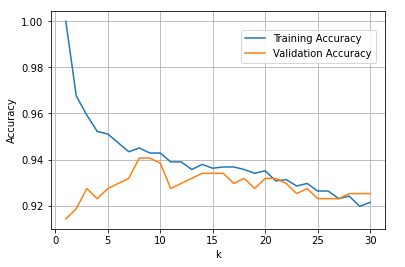

In [216]:
# Plot the mean training and validation accuracies against each value of k. Which value of 𝑘 will you use? Why?
##TODO##
fig, ax = plt.subplots()
x_axis = np.arange(1, max_k + 1)
ax.plot(x_axis, train_accuracy_mean, label = 'Training Accuracy')
ax.plot(x_axis, val_accuracy_mean, label = 'Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
fig.legend(loc='upper right', borderaxespad=3)
plt.grid()

# The naive Bayes classifier

Recall from the lecture notes that the naive Bayes classifier works as follows. We are trying to approximate an unknown function $$f:V \rightarrow \mathcal{O}$$
where $V$ is our feature space and our output space $\mathcal{O} = \{c_1, c_2, ... c_K\}$ is a finite set of classes.

The naive Bayes classifier does this by building a model that assigns the class label $\hat{y} = c_k$ as follows:
$$
\hat{y} = \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)
$$
i.e., the $k$ that maximises this quantity.

In practice, multiplying all the $p(x_i| c_k)$ together is going to give some very small values. Therefore, we can take the log to make it easier to compute:
\begin{align}
\hat{y} &= \text{argmax}_k p(c_k)\prod_i p(x_i| c_k)= \text{argmax}_k log(p(c_k)\prod_i p(x_i| c_k))\\
&=\text{argmax}_k log(p(c_k)) + \sum_i log(p(x_i|c_k))
\end{align}

If we choose that $p(x_i|c_k)$ is given by a normal distribution with mean $\mu_k$ and variance $\sigma_k^2$, then we obtain the following expression:

\begin{align}
\hat{y} &=\text{argmax}_k \log(p(c_k)) + \sum_i \log(p(x_i|c_k))\\
&= \text{argmax}_k \log(p(c_k)) + \sum_i \log\left(\frac{1}{\sigma_k\sqrt{2\pi}} exp\left(\frac{-(x-\mu_k)^2}{2\sigma_k}\right)\right)\\
&= \text{argmax}_k \log(p(c_k)) - \sum_i \log\left(\sigma_k\sqrt{2\pi}\right) - \sum_i\left(\frac{(x-\mu_k)^2}{2\sigma_k}\right) \quad \text{ log-likelihood}
\end{align}

Expressing the values in terms of these sums means that they do not get so small, and it is less likely that there will be errors at the machine precision level.


How do we implement this in practice? We assume that each probability $p(x_i| c_k)$ is given by some distribution, and then given a datapoint $\vec{x}$, we plug the value into the equation for the distribution.

In this question you will: 
    (a) (Optional) implement your own version of the Gaussian naive Bayes classifier, 
    (b) (Optional) check your classifier against the implementation in sci-kit learn, 
    (c) compare the accuracy of the scikit-learn naive Bayes classifier with the accuracy of the k-nearest neighbours classifier, and 
    (d) run cross-validation to verify whether the kNN classfier or the Gaussian naive Bayes classifier performs better on this dataset.

## (Optional) Part (a) Implementing Gaussian naive Bayes
For this question we will make the assumption that each feature is described by a normal (also called Gaussian) distribution. The procedure is as follows:
1. Divide the training data by class
2. Calculate mean and standard deviation per class and per feature
4. For each datapoint in the validation set, calculate the log-likelihood for each class and for each feature (Hint: use the function `scipy.stats.norm.logpdf`)
5. Combine these values together with the probability of the class according to the log-likelihood equation above
6. Choose the class with the highest value


In [195]:
##TODO##
# Write your own implementation of naive Bayes applied to the breast cancer dataset.

# If you wish you can follow the structure below
from scipy.stats import norm

# Split the training data Xtr into training and validation sets with an 80:20 split. 
# Set the random state to help with reproducibility
data = load_breast_cancer()
X = data.data
Y = data.target
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 10)

#Separate the training set into classes, so you have one set of data for each class
##TODO##

# Calculate the means and standard deviations for each class, for each feature. 
# There are 30 features in the dataset, so you should have a 30-dimensional 
# array of means for each class and a 30-dimensional array of standard deviations
# for each class. Remember that you can take the average across rows or columns of 
# a matrix by specifying axis = 1 or axis = 0
##TODO##

# Calculate the prior probability p(c_i) for each class
##TODO##

# Calculate the log-likelihood of each class for each datapoint in the validation set
# Hint: you can use the function scipy.stats.norm.logpdf to help with this
##TODO##

# Your predicted class is 0 if class 0 has the highest log-likelihood, and 1 if class 1 
# has the highest log-likelihood
##TODO##

## (Optional) Part (b) Checking results
We now compare our results with the sklearn implementation. 

In [209]:
##Import the classifier GaussianNB from sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier (use the parameter var_smoothing=0.0),
# fit, and predict the classes
##TODO##
gnb = GaussianNB(var_smoothing = 0.0)
gnb = gnb.fit(Xtr, Ytr)
gnb.score(Xtest, Ytest)

0.956140350877193

In [ ]:
# Compare your predicted classes with those of the sklearn implementation.
# If they are not identical, this may be due to some differences in parameter setting. 
# They should be almost all the same, however.
##TODO##

## Part (c) Comparing k-nearest neighbours and Gaussian naive Bayes
Now, using the sklearn implementations of k-nearest neighbours and naive Bayes, retrain the naive Bayes classifier using the original training set `Xtr`, `Ytr`.
Also retrain the k-nearest neighbours classifier using `Xtr` and `Ytr`. Use the value of $k$ that you decided on using cross-validation.

Compute the accuracy of the naive Bayes classifier over the training set and the held-out test set.

Compare with the accuracy of the k-nearest neighbours classifier on each set.

Is it clear which classifier is the best on this dataset? why or why not?

In [227]:
data = load_breast_cancer()
X = data.data
Y = data.target
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 10)

# Instantiate the knn classifer with your chosen value of k
knn = KNeighborsClassifier(n_neighbors = 8)
knn = knn.fit(Xtr, Ytr)

# Fit the Gaussian naive Bayes classifier and the knn classifier on Xtr, Ytr
gnb = GaussianNB(var_smoothing = 0.0)
gnb = gnb.fit(Xtr, Ytr)

# Make predictions for the training set and the test set
pred_train_knn = knn.predict(Xtr)
pred_test_knn = knn.predict(Xtest)
pred_train_gnb = gnb.predict(Xtr)
pred_test_gnb = gnb.predict(Xtest)

# Take a look at the accuracy scores
##TODO##
print(knn.score(Xtr, Ytr))
print(knn.score(Xtest, Ytest))
print(gnb.score(Xtr, Ytr))
print(gnb.score(Xtest, Ytest))

0.945054945054945
0.9298245614035088
0.9274725274725275
0.956140350877193


## Part (d) Using cross-validation for statistical validation
Earlier we used cross-validation to select the model parameters we would be using. We can also use it another way: to provide statistical information about which model is best. We will set up cross-validation on the whole dataset, with 10 folds.

 - Compute the accuracy for each model on the test set on each fold.
 - Calculate the mean accuracy across folds. Which model performs best?
 - Make a box-plot of the spread of scores of each model. Is there a clear difference between model performance?
 - Perform a paired t-test on the accuracy scores. What can you conclude about the performance of the two models?


In [4]:
# Set up a k-fold cross-validation with 10 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle =True, random_state = 10)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data.data
Y = data.target

In [5]:
# For each fold, fit each model on the training data 
# and compute accuracy on the test data.
from sklearn.neighbors import KNeighborsClassifier
knn_test_accuracy = []
gnb_test_accuracy = []

for train_index, test_index in kf.split(X):
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = Y[train_index], Y[test_index]

    knn = KNeighborsClassifier(n_neighbors = 8)
    knn = knn.fit(xtrain, ytrain)
    knn_test_accuracy.append(knn.score(xtest, ytest))

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB(var_smoothing = 0.0)
    gnb = gnb.fit(xtrain, ytrain)
    gnb_test_accuracy.append(gnb.score(xtest, ytest))

In [8]:
# Compute the mean and standard devation of the accuracies for each model.
# Does one model perform better?
import numpy as np

mean_knn = np.mean(knn_test_accuracy)
std_knn = np.std(knn_test_accuracy)
mean_gnb = np.mean(gnb_test_accuracy)
std_gnb = np.std(gnb_test_accuracy)

print(mean_knn)
print(mean_gnb)
print(std_knn)
print(std_gnb)

0.9366541353383457
0.936654135338346
0.024134521778726086
0.02878723242339041


{'whiskers': [<matplotlib.lines.Line2D at 0x256ebcf3430>,
 'caps': [<matplotlib.lines.Line2D at 0x256ebcf3af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x256ebcf30d0>,
 'medians': [<matplotlib.lines.Line2D at 0x256ebcfc1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x256ebcfc550>,
 'means': []}

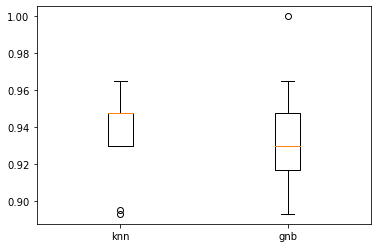

In [16]:
# Make a boxplot of the accuracy scores. (Use plt.boxplot). 
# Is there a clear difference between the models?
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.boxplot([knn_test_accuracy, gnb_test_accuracy], labels = ['knn', 'gnb'])


In [17]:
# Perform a paired t-test (you can use the function scipy.stats.ttest_rel). 
# What do you conclude about the performance of the two models?
from scipy.stats import ttest_rel
ttest_rel(knn_test_accuracy, gnb_test_accuracy)

Ttest_relResult(statistic=0.0, pvalue=1.0)

## Linear Regression
In linear regression we make the assumption that the data $(x_i, y_i)$ can be modelled by a function of the form
$$ \hat{y_i} = f(\vec{x}_i)= \sum_j a_j x_{ij}  + b_i$$

Recall that we can express this in a matrix format by:
$$ \hat{\vec{y}} = f(X)= X\Theta$$

where 
$$ X=\begin{pmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,n} &1 \\
\vdots & \vdots & \ldots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,n} & 1
\end{pmatrix}, \quad \vec{y}=\begin{pmatrix} y_1 \\ \vdots \\y_N \end{pmatrix}, \quad \Theta=\begin{pmatrix} a_1 \\ \vdots \\a_n\\b \end{pmatrix}$$

We saw in lectures that the optimal value of $\Theta$ is given by setting
$$ \Theta = (X^T X)^{-1} X^T \vec{y}$$

The quantity $(X^T X)^{-1} X^T$ is called the psuedoinverse of X, and can be computed using the function `np.linalg.pinv`.

We will (a) perform a linear regression on the diabetes dataset. You can load this dataset using the function `load_diabetes` from `sklearn.datasets`. (b) compute the mean squared error and the R^2, and (c) compare your results with the built in function in sklearn (`sklearn.linear_model.LinearRegresion()`). You should get the same results.

In [111]:
# import statments here
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part (a) Implementing linear regression

In [130]:
# Load the diabetes dataset 
data = datasets.load_diabetes()
X = data.data
Y = data.target

# Split the dataset into training and test, using test_size=0.2
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2)

In [131]:
# Add a column of ones to Xtrain and Xtest for the intercept term
add_train = np.ones((Xtrain.shape[0], 1))
add_test = np.ones((Xtest.shape[0], 1))
Xtrain = np.hstack((Xtrain, add_train))
Xtest = np.hstack((Xtest, add_test))

In [135]:
# Calculate the value of the coefficients theta. You can use the function np.linalg.pinv
theta = (np.linalg.pinv((Xtrain.T).dot(Xtrain))).dot(Xtrain.T).dot(Ytrain)

In [136]:
theta

array([ -27.18757681, -224.07499349,  515.1608989 ,  355.50459197,
       -615.56183478,  303.27604489,   63.79700948,  224.61285218,
        584.3411041 ,   97.10686401,  152.16862826])

## Part (b) Computing performance metrics

In [144]:
theta.shape

(11,)

In [145]:
# Make a prediction on the test set by applying the coefficients theta to the test set
y_pred = Xtest.dot(theta.reshape(-1,1))

In [146]:
# Calculate the mean squared error and the R^2. 
# You can use the built in functions from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(Ytest, y_pred)
R2 = r2_score(Ytest, y_pred)

print(MSE)
print(R2)

3109.932546010657
0.5483157529194185


## Part (c) Checking results
Compare your results with the built in function `sklearn.linear_model.LinearRegression()`

In [148]:
# Instantiate the linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [157]:
# Fit the model and make a prediction on the test set. Compare with your implementation
lr =lr.fit(Xtrain, Ytrain)
ytest_pred = lr.predict(Xtest)

MSE_sklearn = mean_squared_error(Ytest, ytest_pred)
R2_sklearn = r2_score(Ytest, ytest_pred)

print(np.round(MSE,9) == np.round(MSE_sklearn,9))
print(np.round(R2,9) == np.round(R2_sklearn,9))

True
True


In [160]:
max(list(y_pred))

array([263.88651297])

Visualise the perfomance of the regression by plotting your predicted values vs target values on a scatter plot, and drawing a line y=x. If all predictions were perfect, the predicted values would lie on the line.

Text(0, 0.5, 'Y_predicted')

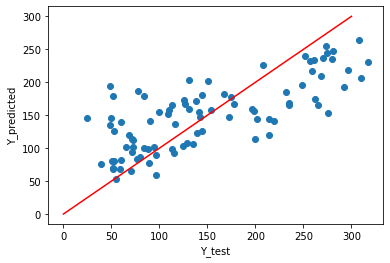

In [166]:
# Plot predicted values vs target values on a scatter plot, and drawing a line y=x
fig, ax =plt.subplots()
ax.scatter(Ytest, ytest_pred)
ax.plot(np.linspace(0,300),np.linspace(0,300),'r')
plt.xlabel('Y_test')
plt.ylabel('Y_predicted')

# (Optional) Polynomial regression
The term 'linear' in linear regression refers only to the coefficients $\theta$. We can in fact compute polynomial terms in the data and perform linear regression over this extended dataset to get a better fit to the data.

To compute polynomial terms in the data automatically, you can use the class `sklearn.preprocessing.PolynomialFeatures`. To find out how to use it, look at the guidance (you can type `help(PolynomialFeatures)` once you have imported it).

The following small dataset (in the cell below) gives a relationship between temperature and yield for an experiment. Use cross-validation to select the degree of the polynomial that best fits this data.

Plot the mean squared error against degree on the training set and on the validation set. Which degree of polynomial best fits this data?

In [170]:
# Data
X = np.array([50,50,50,70,70,70,80,80,80,90,90,90,100,100,100]).reshape(-1, 1)
y = np.array([3.3,2.8,2.9,2.3,2.6,2.1,2.5,2.9,2.4,3,3.1,2.8,3.3,3.5,3]).reshape(-1, 1)

In [179]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import plot
import numpy as np

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2)

kf = KFold(n_splits = 5, random_state = 10, shuffle = True)

max_d = 5
train_accuracies = [[] for _ in range(max_d)]
val_accuracies = [[] for _ in range(max_d)]

for d in range(max_d):
    lr = LinearRegression()
    poly = PolynomialFeatures(degree = d + 1)

    for train_index, val_index in kf.split(Xtrain):
        x_train, x_val = Xtrain[train_index], Xtrain[val_index]
        y_train, y_val = Ytrain[train_index], Ytrain[val_index]

        new_x_train = poly.fit_transform(x_train)
        new_x_val = poly.fit_transform(x_val)

        lr =lr.fit(new_x_train, y_train)

        pred_train = lr.predict(new_x_train)
        pred_val = lr.predict(new_x_val)

        train_accuracies[d].append(mean_squared_error(y_train, pred_train))
        val_accuracies[d].append(mean_squared_error(y_val, pred_val))

mean_train_accuracy = np.mean(train_accuracies, axis = 1)
mean_val_accuracy = np.mean(val_accuracies, axis = 1)

Text(0, 0.5, 'MSE')

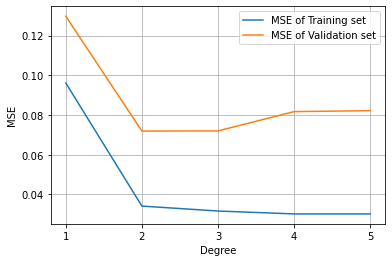

In [186]:
fig, ax = plt.subplots()
x_axis = np.arange(1, max_d + 1)
ax.plot(x_axis, mean_train_accuracy.reshape(-1, 1), label = 'MSE of Training set')
ax.plot(x_axis, mean_val_accuracy.reshape(-1, 1), label = 'MSE of Validation set')
plt.legend()
plt.grid()
plt.xticks(np.arange(1, 6))
plt.xlabel('Degree')
plt.ylabel('MSE')         ### degree = 2 or 3

# Single Layer Neural Network

In this question we apply a single-layer neural network to a linearly separable toy data set.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

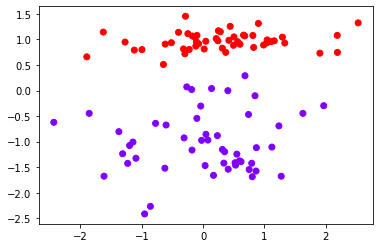

In [61]:
X1, y1 = make_classification(n_features=2, n_redundant=0, \
            n_informative=1, random_state=1,n_clusters_per_class=1)
fig1, ax1 = plt.subplots()
ax1.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
plt.show()

In [62]:
nn1=Perceptron(alpha=1, max_iter=1000) 
model=nn1.fit(X1,y1)

(Optional) Plot the line that the perceptron is modelling. Look at the documentation to find out how you can get the values of the weights and the bias.

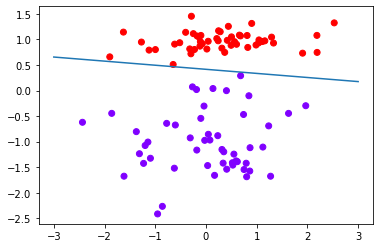

[[0.19273844 2.40770049]]
[-1.]


In [64]:
inter = model.intercept_
coef = model.coef_

x_axis = np.arange(-3,4)
y_axis = -(x_axis * coef[0][0] + inter) / coef[0][1]

fig, ax = plt.subplots()
ax.scatter(X1[:,0],X1[:,1],c=y1, cmap='rainbow')
ax.plot(x_axis, y_axis)
plt.show()
print(coef)
print(inter)


We can visualise the performance of this network again using a scatter plot, and colour the points using predicted class. Is the network able to give the right classification for each point?

1.0


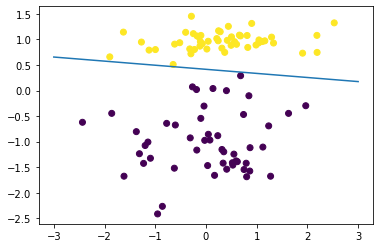

In [67]:
ypred1=model.predict(X1)
# Make a scatter plot of the predictions.
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], c = ypred1)
x_axis = np.arange(-3,4)
y_axis = -(x_axis * coef[0][0] + inter) / coef[0][1]
ax.plot(x_axis, y_axis)

# How do the predictions compare with the ground truth? Compute the accuracy to compare
print(model.score(X1, y1))

# Multi-Layer NN on Toy Problems
In this question we consider two toy problems in which the classes are not linearly separable. In the first example the two classes form moon shapes.

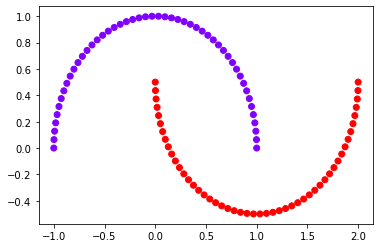

In [68]:
X2, y2 = make_moons()
fig2, ax2 = plt.subplots()
ax2.scatter(X2[:,0],X2[:,1],c=y2, cmap='rainbow')

Try fitting a single-layer neural network to the data. 
Comment on the performance and hypothesise what might be the source of the errors.

In [76]:
#TODO
from sklearn.linear_model import Perceptron
pp = Perceptron(alpha = 1, max_iter = 1000) 
model = pp.fit(X2, y2)
y_pred = model.predict(X2)

0.82


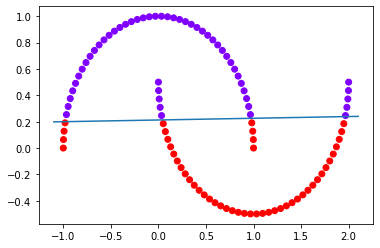

In [80]:
inter2 = model.intercept_
coef2 = model.coef_
fig, ax = plt.subplots()
ax.scatter(X2[:,0],X2[:,1],c=y_pred, cmap='rainbow')
x_axis = np.linspace(-1.1, 2.1, 100)
y_axis = -(x_axis *coef2[0][0] + inter2) / coef2[0][1]
ax.plot(x_axis, y_axis)
print(model.score(X2, y2))

We can now try to fit a multi-layer NN to the same data

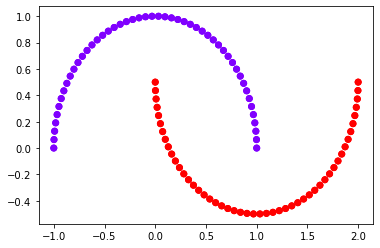

In [81]:
nn2=MLPClassifier(alpha=1,hidden_layer_sizes=(10,10,10,10), max_iter=1000)
model2=nn2.fit(X2,y2)
ypred2=model2.predict(X2)
ax2.scatter(X2[:,0],X2[:,1],c=ypred2, cmap='rainbow')
fig2

This NN has 4 hidden layers each with 10 neurons. The parameter
`hidden_layer_sizes=(x,y,z, ...)` identifies the number of neurons in each layer. Try experimenting with different configurations of hidden layers to see the effect on performance.

Investigate the parameter `activation`. What are the different activation functions?

The activation functions are: identity, logistic, tanh, relu.
default: relu

We now introduce another toy classification problem based on classes in the form of two circles. Experiment with using different NN architectures to fit this data and plot the results.

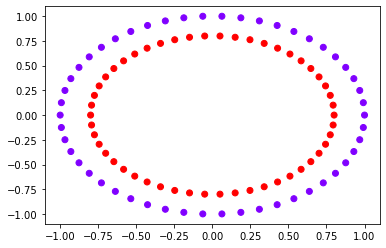

In [82]:
X3, y3 = make_circles()
fig3, ax3 = plt.subplots()
ax3.scatter(X3[:,0],X3[:,1],c=y3, cmap='rainbow')
plt.show()

In [113]:
ann = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10), alpha = 1, max_iter = 1000)  ### 拟合容易失败，对于相同的隐藏层也可能有不同结果
y_pred = ann.predict(X3)
ann.score(X3, y3)

1.0

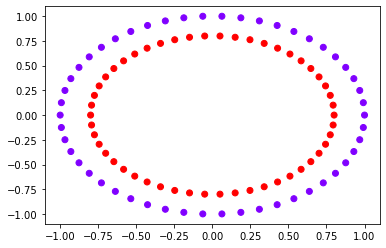

In [114]:
fig, ax = plt.subplots()
ax.scatter(X3[:,0],X3[:,1],c=y_pred, cmap='rainbow')